## Evaluate NCES

In [13]:
import json
from collections import Counter
import seaborn as sns
sns.set_theme(style="whitegrid")

In [23]:
def get_diverse_predictions(kb):
    with open(f'datasets/{kb}/Results/NCES.json') as file:
        results = json.load(file)
    Results = [kb]
    top_performance = Counter()
    for i in range(len(results['GRU']['f1']['values'])):
        if min([results[key]['f1']['values'][i] for key in results]) < 10:
            preds = [(key, results[key]['prediction']['values'][i], results[key]['f1']['values'][i]) for key in results]
            preds_ = sorted(preds,key = lambda x: -x[-1])
            Results.append(preds)
            top_performance[preds_[0][0]] += 1
            if min([results[key]['f1']['values'][i] for key in results]) == 0:
                print("Drastic difference: ", preds_)
    print('\n\nTop performance: ', top_performance)
    return Results, top_performance

In [24]:
Res1, top1 = get_diverse_predictions('carcinogenesis')

Drastic difference:  [('LSTM', 'Hydrogen-2 ⊔ Selenium', 66.667), ('SetTransformer', 'Manganese-85 ⊔ Manganese-85', 50.0), ('GRU', 'Calcium-84 ⊔ Nitrogen-37', 0.0)]
Drastic difference:  [('SetTransformer', 'Compound ⊔ Compound', 96.866), ('LSTM', 'Carbon-21 ⊔ Compound', 92.14099999999999), ('GRU', 'Carbon-193 ⊔ Sulfur-74', 0.0)]
Drastic difference:  [('SetTransformer', 'Ketone ⊔ Oxygen-49', 100.0), ('GRU', 'Nitro ⊔ Phosphorus-62', 0.0), ('LSTM', 'Hydrogen-8 ⊔ Sulfide', 0.0)]
Drastic difference:  [('GRU', 'Iodine ⊔ (∃ inBond.(Carbon-29 ⊔ Oxygen-53))', 100.0), ('LSTM', 'Iodine ⊔ (∃ inBond.(Carbon-29 ⊔ Sulfur-72))', 94.253), ('SetTransformer', 'Manganese-85 ⊔ Manganese-85', 0.0)]
Drastic difference:  [('GRU', 'Di281 ⊔ Ring ⊔ Ring', 99.679), ('SetTransformer', 'Imine ⊔ Ring', 98.99900000000001), ('LSTM', 'Di8 ⊔ Oxygen-41', 0.0)]


Top performance:  Counter({'GRU': 5, 'SetTransformer': 4, 'LSTM': 2})


In [25]:
Res2, top2 = get_diverse_predictions('mutagenesis')

Drastic difference:  [('GRU', 'Carbon-27 ⊔ Carbon-27', 99.868), ('SetTransformer', 'Bromine ⊔ Carbon-27', 99.605), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Carbon-230 ⊔ Chlorine', 96.97), ('GRU', 'Nitrogen-36 ⊔ Sulfur', 0.0), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Nitrogen-36 ⊔ (∃ hasAtom.Sulfur)', 100.0), ('GRU', 'Nitrogen-36 ⊔ (∃ hasAtom.Sulfur)', 100.0), ('LSTM', 'Iodine ⊔ (∃ inBond.Oxygen-42)', 0.0)]
Drastic difference:  [('SetTransformer', 'Nitrogen-35 ⊔ Oxygen-50', 100.0), ('GRU', 'Oxygen-50 ⊔ (∃ inBond.Oxygen-42)', 79.07), ('LSTM', 'Nitrogen-34 ⊔ (∃ inBond.Oxygen-42)', 0.0)]
Drastic difference:  [('GRU', 'Bond-2 ⊔ Carbon-194', 97.399), ('SetTransformer', 'Bond-2 ⊔ Ring_size_5', 92.014), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Oxygen-49 ⊔ (∃ hasAtom.Nitrogen-31)', 18.182000000000002), ('GRU', 'Bond-5 ⊔ (∃ hasAtom.Nitrogen-31)', 14.285999999999998), ('LSTM', '

In [26]:
Res3, top3 = get_diverse_predictions('semantic_bible')

Drastic difference:  [('SetTransformer', 'CognitiveAgent ⊔ Human', 99.612), ('GRU', 'EthnicGroup ⊔ Human', 95.322), ('LSTM', 'Character ⊔ EthnicGroup', 0.0)]


Top performance:  Counter({'SetTransformer': 2})


In [27]:
Res4, top4 = get_diverse_predictions('vicodi')

Drastic difference:  [('GRU', 'Board ⊔ Trades-Union', 50.0), ('SetTransformer', 'Astronaut ⊔ Trade-Association', 0.0), ('LSTM', 'Publisher ⊔ Publisher', 0.0)]
Drastic difference:  [('SetTransformer', 'Trades-Union ⊔ Trades-Union', 100.0), ('GRU', 'Settlement', 0.0), ('LSTM', 'Other-Religious-Person', 0.0)]
Drastic difference:  [('GRU', 'Armament ⊔ Natural-Object', 100.0), ('SetTransformer', 'Disaster ⊔ Natural-Object', 86.02199999999999), ('LSTM', 'Crime ⊔ Structure', 0.0)]
Drastic difference:  [('GRU', 'Fictional-Event ⊔ Theologian', 64.286), ('SetTransformer', 'Military-Organisation ⊔ Theologian', 42.857), ('LSTM', 'Badge ⊔ Jurist', 0.0)]
Drastic difference:  [('SetTransformer', 'Social-Stratum', 100.0), ('GRU', 'Clothing', 0.0), ('LSTM', 'Publisher ⊔ Trades-Union', 0.0)]
Drastic difference:  [('SetTransformer', 'Environment ⊔ Idea', 100.0), ('LSTM', 'Idea ⊔ Idea', 98.75), ('GRU', 'Board ⊔ Publisher', 0.0)]


Top performance:  Counter({'SetTransformer': 9, 'GRU': 3, 'LSTM': 3})


In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def show_performance(results, top_performance):
    def short_name(name):
        if name == 'SetTransformer':
            return 'ST'
        return name
    fig, ax = plt.subplots()    
    separate_results = np.array([[[i, results[1:][i][j][-1]] for i in range(len(results)-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        if name == 'ST': name = 'SetTransformer'
        ax.scatter(separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(top_performance[name]/max(top_performance.values()), 0.1)), alpha=0.7, label=short_name(name))
    ax.legend()
    ax.grid(True)
    plt.title(results[0].capitalize())
    plt.show()

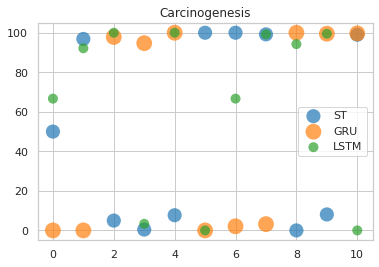

In [34]:
show_performance(Res1, top1)

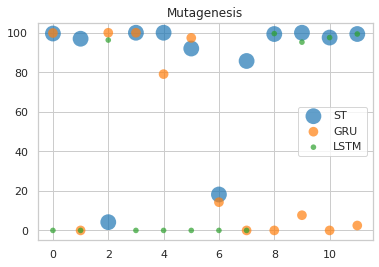

In [35]:
show_performance(Res2, top2)

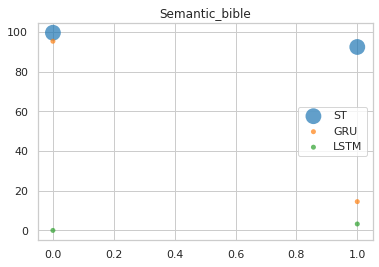

In [36]:
show_performance(Res3, top3)

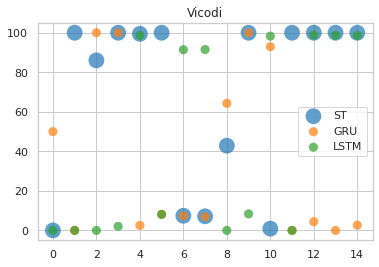

In [37]:
show_performance(Res4, top4)